# Python for scientists who code: An opinionated introduction
This tutorial aims two convince you of two things: first, that Python is a pretty great programming language; and second, that if you're a scientist, Python is probably worth learning. It does *not* aim to convince you that Python is the right language for everything; on the contrary, I explicitly discuss several scenarios at the end under which opting for Python would clearly be the wrong choice. The goal is simply to provide an (admittedly opinionated) review of some of Python's core features, and make a case for its superiority over other commonly used alternatives (most notably, R and Matlab) as a *general-purpose* scientific computing language.

The rest of this tutorial assumes that you have some prior programming experience--and will make the most sense if you're fairly proficient in another data-centric language like R or Matlab. It's not intended to be a proper introduction to Python--i.e., the emphasis is on *why* you should learn Python, and not on *how* to write Python code (though there are dozens of excellent tutorials to that effect elsewhere).

### At a glance
Python is a widely-used, easy-to-learn, high-level, general-purpose, dynamic programming language.

That's quite a mouthful, so let's discuss some of these features individually.

## Python is (relatively) easy to learn
Programming is hard, so, in an absolute sense, no programming language is easy to learn unless you already have prior programming experience. But, comparatively speaking, Python's high-level nature (see next section), readable syntax, and use of semantic whitespace make the language easier to pick up than many others. For example, here's a (deliberately uncommented) definition of a simple Python function that converts a string of English words to (crummy) [Pig Latin](https://en.wikipedia.org/wiki/Pig_Latin):

In [115]:
def pig_latin(text):
    ''' Takes in a sequence of words and converts it to (imperfect) pig latin. '''
    
    word_list = text.split(' ')
    output_list = []

    for word in word_list:

        word = word.lower()

        if word.isalpha():
            first_char = word[0]
        
            if first_char in 'aeiou':
                word = word + 'ay'
            else:
                word = word[1:] + first_char + 'yay'

            output_list.append(word)
    
    pygged = ' '.join(output_list)
    return pygged

The above function won't actually produce completely valid pig latin (assuming that there's such a thing as "valid pig latin"), but that's okay. It does *something* passable:

In [116]:
test1 = pig_latin("let us see if this works")

print(test1)

etlyay usay eesyay ifay histyay orkswyay


Pig Latin aside, the point here is just that the code is pretty easy to read--for several reasons. First, the code is written at a high level of abstraction (more on this below), so that each line of code maps onto a fairly intuitive operation like "take the first character of this word", and not onto a less intuitive lower-level operation like "reserve 1 byte of memory for a character I'm going to hand you in a moment". Second, the control structures (i.e., for-loops, if-then conditionals, etc.) use simple words like "in", "and", and "not" that have semantics relatively close to their natural English meanings. Third, Python's [strict control of indentation](http://www.secnetix.de/olli/Python/block_indentation.hawk) imposes a level of discipline that keeps code readable while also preventing certain very common kinds of errors. And fourth, the Python community's strong emphasis on adhering to [style conventions](https://www.python.org/dev/peps/pep-0008/) and writing "Pythonic" code means that Python programmers, more so than those working in many other languages, tend to use consistent naming conventions, line lengths, programming idioms, and many other similar features that collectively make it easier to read someone else's code (though admittedly this is more a feature of the community rather than the language itself).

## Python is a high-level language
Compared to many other common languages, Python is a relatively "high level" language: it doesn't require (and in many cases, doesn't *allow*) users to worry about a lot of the low-level details that many other language require one to deal with. For example, suppose we want to create a variable called "my_box_of_things" that's intended to serve as a container for all of our belongings. We don't know ahead of time how many objects we might want to hold in our box--and we want to allow the number of objects to grow or shrink automatically as we add or remove them. So we need our box to take up a variable amount of space: at one point in time, it might contain 8 things (or "elements"), while at another point in time, it might contain 257 things. In a low-level language like C, this simple requirement would already introduce some complexity to our program, because we'd need to declare ahead of time how much space we need our box to take up, and then every time we wanted to increase the amount of space the box requires, we'd need to explicitly create an entirely new box with more space assigned, and then copy all of our stuff into it.

By contrast, in Python, we don't have to worry about any of this stuff--even though more or less the same process is happening (less efficiently) under the hood. From our perspective, we can just create our box and add to or remove from it as we like:

In [117]:
# Create a box (really, a 'list') with 5 things
my_box_of_things = ['Davenport', 'kettle drum', 'swallow-tail coat', 'table cloth', 'patent leather shoes']

print(my_box_of_things)

['Davenport', 'kettle drum', 'swallow-tail coat', 'table cloth', 'patent leather shoes']


In [118]:
# Add a few more things
my_box_of_things += ['bathing suit', 'bowling ball', 'clarinet', 'ring']

# Maybe add one last thing
my_box_of_things.append('radio that only needs a fuse')

# Let's see what we have...
print(my_box_of_things)

['Davenport', 'kettle drum', 'swallow-tail coat', 'table cloth', 'patent leather shoes', 'bathing suit', 'bowling ball', 'clarinet', 'ring', 'radio that only needs a fuse']


More generally, Python (and by definition, all other high-level languages) tends to hide all kinds of rote declarations from you that you'd need to make explicit in lower-level languages. This allows us to write very compact, clear code (though it typically also comes at the cost of decreased performance, because the internals are no longer accessible, and hence optimization is more difficult).

For example, consider the seemingly simple act of reading plain text from a file. To someone not yet scarred by direct, unprotected contact with a file system, this may conceptually seem like something that can be done in just two simple operations: first we open a file, and then we read from it. In reality, there is of course much more to it than that. And languages that live closer to the metal than Python will generally force (or at least, encourage) us to acknowledge that. For example, here's the canonical (though certainly not the most terse) way to read the contents from a file in Java:

```java
import java.io.BufferedReader;
import java.io.FileReader;
import java.io.IOException;

public class ReadFile {
    public static void main(String[] args) throws IOException{
        String fileContents = readEntireFile("./foo.txt");
    }

    private static String readEntireFile(String filename) throws IOException {
        FileReader in = new FileReader(filename);
        StringBuilder contents = new StringBuilder();
        char[] buffer = new char[4096];
        int read = 0;
        do {
            contents.append(buffer, 0, read);
            read = in.read(buffer);
        } while (read >= 0);
        return contents.toString();
    }
}```

You can see that we have to do all kinds of painful stuff like importing file readers, creating a buffer for the contents of the file, reading in chunks of the file in blocks and assigning them to the buffer, and so on. By contrast, this is all it takes to read the full contents of a file in Python:

In [119]:
# Read the contents of "hello_world.txt"
text = open("hello_world.txt").read()

Of course, this terseness isn't unique to Python; there are plenty of other high-level languages that similarly hide most of the nasty internal workings implied by your simple request from you (e.g., Ruby, R, Haskell, etc.). BUT. Relatively few of those other languages can lay equal claim to the next feature of Python worth discussing...

## Python is a general-purpose language
Python is, by design, a general-purpose language. That's to say, it's designed to allow programmers to write almost any kind of application, in any domain, rather than focusing on one specific kind of problem. Python can be contrasted in this respect with (relatively) domain-specific languages such as R or PHP, which can in principle be used for many things, but are nevertheless clearly optimized for a particular use case (in the case of these two examples, for statistics and back-end website development, respectively).

Python is often lovingly referred to as "the second best language for everything", which nicely captures the sentiment that while there are many cases where Python is not the *best* language to use for a particular problem, it's usually sufficiently flexible and well-supported that one can still solve the problem relatively efficiently. The fact that Python can be effectively used for many different kinds of applications makes learning Python an excellent value proposition, because it is a pretty big boon as a software developer to be able to use a single language for everything, rather than having to constantly switch between languages and environments depending on what task one is performing.

### The standard library
The generality of Python is perhaps easiest to appreciate by glancing at the gigantic [list of modules](https://docs.python.org/3/library/index.html) available in the standard library--that is, the set of tools that comes bundled with the Python interpreter out-of-the-box (without having to install any third-party packages). Consider just a handful of examples:

* os: operating system tools
* re: regular expressions
* collections: useful data structures
* multiprocessing: simple parallelization tools
* pickle: simple serialization
* json: reading and writing JSON
* argparse: command-line argument parsing
* functools: functional programming tools
* datetime: date and time functions
* cProfile: basic tools for profiling code

This (very partial) list may not seem so impressive at a glance, but it's a relatively common experience for Python developers, upon Googling for a problem that seems non-trivial and perhaps even a bit esoteric, to find a built-in solution tucked away somewhere in one of the standard library modules.

#### JSON, the easy way
For example, suppose you find yourself wanting to read in some JSON data from the web. JSON looks like this:

In [120]:
data_string = '''
[
  {
    "_id": "59ad8f86450c9ec2a4760fae",
    "name": "Dyer Kirby",
    "registered": "2016-11-28T03:41:29 +08:00",
    "latitude": -67.170365,
    "longitude": 130.932548,
    "favoriteFruit": "durian"
  },
  {
    "_id": "59ad8f8670df8b164021818d",
    "name": "Kelly Dean",
    "registered": "2016-12-01T09:39:35 +08:00",
    "latitude": -82.227537,
    "longitude": -175.053135,
    "favoriteFruit": "durian"
  }
]
'''

We *could* spend some time writing our own json parser, or we *could* try to find a fancy third-party package that reads json... but we'd most likely be wasting our time, because Python has a built-in json module that already does exactly what we need:

In [121]:
import json

data = json.loads(data_string)

print(data)

[{'_id': '59ad8f86450c9ec2a4760fae', 'name': 'Dyer Kirby', 'registered': '2016-11-28T03:41:29 +08:00', 'latitude': -67.170365, 'longitude': 130.932548, 'favoriteFruit': 'durian'}, {'_id': '59ad8f8670df8b164021818d', 'name': 'Kelly Dean', 'registered': '2016-12-01T09:39:35 +08:00', 'latitude': -82.227537, 'longitude': -175.053135, 'favoriteFruit': 'durian'}]


Notice that, before we can use the `loads` function in the `json` module, we have to `import` the json module. This pattern of having to import almost all functionality into the namespace explicitly is taken quite seriously in Python. The list of [built-in functions](https://docs.python.org/3/library/functions.html) available in the base namespace is *very* limited. Many people who come from languages like R or Matlab--where the global namespace includes hundreds or even thousands of convenient functions--initially find this irritating. But once you get used to having to type a few extra characters, it makes it much easier to read and manage code, and the risk of naming conflicts (which occur with frightening regularity in, e.g., R) is dramatically decreased.

### Exceptional external support
Of course, the fact that Python provides built-in tools to do lots of things doesn't mean it makes sense to always use those tools. Arguably, an even bigger selling point than the richness of its standard library is the massive community of developers working in Python (for years, Python has been the world's [most popular dynamic programming language](https://www.tiobe.com/tiobe-index/)) and contributing a vast array of high-quality packages. 

Consider just a few of the domains where Python packages provide some of the most widely used solutions to common problems (this list may well be out of date by the time you read this!):

* Web and API development: flask, Django, Falcon, hug
* Scraping data and parsing text/markup: requests, beautifulsoup, scrapy
* Natural language processing (NLP): nltk, gensim, textblob
* Numerical computation and data analysis: numpy, scipy, pandas, xarray
* Machine learning: scikit-learn, Theano, Tensorflow, keras
* Image processing: pillow, scikit-image, OpenCV
* Plotting: matplotlib, seaborn, ggplot, Bokeh
* Etc. etc. etc.

A related benefit is that Python has an excellent package management ecosystem. While installing individual packages in Python is admittedly often more difficult than installing packages in R or Matlab (largely because Python packages tend to have a higher degree of modularity and/or depend more on system libraries), *in principle* at least, most Python packages can be installed from the command prompt using the `pip` package manager. More sophisticated installers and package managers such as Anaconda have also greatly diminished the pain that used to accompany setting up a new Python environment.

## Python is a (relatively) fast language
This one might seem a bit surprising; on its face, the claim that Python is a fast language may seem silly, because, in benchmarks comparing Python with compiled languages like C or Java, Python typically [gets smoked](https://benchmarksgame.alioth.debian.org/u64q/compare.php?lang=python3&lang2=gpp). And there's no question that, if speed is of the essence (e.g., you're writing a 3D graphics engine, or running massive fluid dynamics simulations), Python is probably not going to be your language of choice (or even the second best language, for that matter). BUT, in practice, the limiting factor in many scientists' workflow is not execution time but development time. A computationally inefficient script that takes an hour to write but only five minutes to write is often preferable to one that takes five seconds to run, but a week to write and debug. Moreover, as we'll see below, even in cases where all of our code is written in Python, a little bit of optimization can often make it run almost as fast as a native C solution. In practice, for most scientists, there are not very many situations where a Python-based solution is not fast enough to work--and the number of such cases is decreasing rapidly as the tooling improves.

### Don't reinvent the wheel
A general principle in software development is that reinventing the wheel should be avoided when possible. Of course, sometimes it *isn't* possible, and there are many cases where it makes sense to write your own solution to a problem, or create an entirely new tool. But as a general rule of thumb,  the less Python code you write yourself, the better your performance will be. There are several reasons for this:

* Python is a mature language, so many of the existing packages have large userbases and have been heavily optimized. This is true, for example, for most of the core scientific libraries in Python (numpy, scipy, pandas, etc.).
* Most of Python is actually written in C and not in Python. For most of the standard library, when you call a Python function, there's a good chance you're actually executing C code that has a Python interface. This means that no matter how ingenious your algorithmic approach to a problem may be, if you plan on writing it in pure Python, and the built-in solution is written in C, you'll probably lose. A naive implementation is, of course, even less likely to impress. For example, here's the built-in `sum` function (written in C) in action:

In [122]:
# Create a list of random floats
import random
my_list = [random.random() for i in range(10000)]

In [123]:
# Python's built-in sum() function is pretty fast
%timeit sum(my_list)

47.7 µs ± 4.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Algorithmically, there's not much you can do to speed up computing the sum of a list of arbitrary numbers. So you might imagine that, what the hell, you may as well just write your own sum in Python, and maybe that way you can any overhead in the built-in sum function in case it's doing any internal validation. Well... not so much.

In [124]:
def ill_write_my_own_sum_thank_you_very_much(l):
    s = 0
    for elem in my_list: 
        s += elem 
    return s

%timeit ill_write_my_own_sum_thank_you_very_much(my_list)

331 µs ± 50.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


At least in this case, rolling your own naive code is probably not the solution. That doesn't mean you have to live with built-in `sum()` as the limits of performance in Python though! Since pure Python isn't optimized for numerical operations involving large inputs, it shouldn't be terribly surprising if the built-in method performs suboptimally when summing large lists. What we should do in this type of situation is ask: "is there some other Python library designed for numerical analysis of potentially large inputs?" And the answer, as you probably know, is yes: the *numpy* package, which is a staple of the scientific Python ecosystem (the vast majority of scientific computing packages in Python build on numpy in one way or another), contains all kinds of computational functions that could help us.

In this case, the solution is trivial: if we convert our pure Python list to a numpy array, we can immediately call numpy's `sum` method, which we might expect should be faster than the core Python implementation (technically, we could also pass `numpy.sum` a Python list, and it will implicitly convert it to an array--but if we plan to re-use the numpy array again, it's better to explicitly convert it ourselves).

In [125]:
import numpy as np

my_arr = np.array(my_list)

%timeit np.sum(my_arr)

7.92 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


So simply switching to numpy speeds up our list-summing by a full order of magnitude, without having to implement anything ourselves.

### Need more speed?
Of course, there's no getting around the fact that sometimes, even with all of the C bindings and highly optimized implementations, your existing Python code just isn't fast enough to cut it. In such cases, your knee-jerk response might be to give up and switch to a "real" language. And often, that's a perfectly reasonable instinct. But before you start porting your code in C or Java--and, in all likelihood, have to spend way longer on development--you may want to consider a couple of other, much less effortful approaches.

#### Write C, in Python
First, you could try writing *Cython* code. Cython is a superset of Python that allows you to embed (some) C code directly into your Python code. Rather than running in an interpreted fashion, your Python files (or specific parts of them) will then be compiled down to C code before execution. The practical upshot is that you can keep writing code that looks *almost* entirely like Python, but still benefits from the judicious introduction of C code. In particular, simply providing C type declarations can often dramatically boost performance.

Below is a Cython-ized version of our naive summing code:

In [126]:
# Jupyter extension that allows us to run Cython cell magics
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [127]:
%%cython
def ill_write_my_own_cython_sum_thank_you_very_much(list arr):
    cdef int N = len(arr)
    cdef float x = arr[0]
    cdef int i
    for i in range(1 ,N):
        x += arr[i]
    return x

In [128]:
%timeit ill_write_my_own_cython_sum_thank_you_very_much(my_list)

227 µs ± 48.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


There are a couple of things worth noting about the Cython version. First, it takes a small (but noticeable) amount of time to compile, the first time you execute the cell defining the method. That's because, unlike pure Python, the code isn't interpreted line-by-line as it's executed; instead, the Cythonized function has to be compiled to C before it can be invoked.

Second, while the Cythonized summing function is faster than the naive Python sum we wrote above, it's still much slower than both the built-in sum method and the numpy implementation. This result says more about our particular implementation and the nature of the problem than about the general benefits of Cython, however; in many cases, an effective Cython implementation can easily boost execution time by an order or two of magnitude.

#### Cheating with numba
Cython isn't the only way to boost performance inside Python. Another exciting approach that's even simpler, from a development standpoint, is to rely on *just-in-time* compilation, where a piece of Python code is compiled into optimized C code the first time it's called. Great progress has been made on just-in-time compilers for Python in recent years. Probably the most mature implementation can be found in the [numba](https://numba.pydata.org/) package, which provides a simple `jit` decorator that can be easily attached to any method.

Our previous example isn't great at highlighting how profound an impact JITs can have, so let's switch to a slightly more complicated one. Here we'll define a new function called `multiply_randomly` that takes a 1D array of floats as input and multiplies each element in the array by one of the other, randomly-selected elements. It then returns the sum of all (randomly multiplied) elements.

Let's start by define a very naive implementation, where we don't even take advantage of the fact that our random multiplication operation can be easily vectorized. Instead, we'll naively loop over each element in the input array, pick out a random other element from the list, multiple the two, and assign the result to a particular index. If we benchmark this function, we'll find that it runs pretty slowly.

In [129]:
import numpy as np

def multiply_randomly_naive(l):
    n = l.shape[0]
    result = np.zeros(shape=n)
    for i in range(n):
        ind = np.random.randint(0, n)
        result[i] = l[i] * l[ind]
    return np.sum(result)

%timeit multiply_randomly_naive(my_arr)

25.7 ms ± 4.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Before we do any just-in-time compiling, we should first ask ourselves if the above function could be written in a more numpy-agreeable way. Numpy is optimized for array-based operations, so loops should be avoided at all costs, as they can be *very* slow. Fortunately, our code can be very easily vectorized (and as a bonus is also easier to read):

In [130]:
def multiply_randomly_vectorized(l):
    n = len(l)
    inds = np.random.randint(0, n, size=n)
    result = l * l[inds]
    return np.sum(result)

%timeit multiply_randomly_vectorized(my_arr)

234 µs ± 50.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


On my machine, the vectorized version runs approximately 100 times faster than the naive, looping code. That kind of performance difference between loop and array operations is entirely typical for numpy, and underscores the importance of thinking algorithmically about what it is that you're trying to do.

...Or maybe it doesn't. Suppose that, instead of spending time refactoring our naive, slow implementation, we simply slap a decorator on our function that tells the numba library that we want to compile the function down to C when we first invoke it. Literally the only difference between the function `multiply_randomly_naive_jit` below, and the `multiply_randomly_naive` function defined above, is the @jit decorator. Surely, four small characters couldn't make *that* big a difference, right?

In [131]:
import numpy as np
from numba import jit

@jit
def multiply_randomly_naive_jit(l):
    n = l.shape[0]
    result = np.zeros(shape=n)
    for i in range(n):
        ind = np.random.randint(0, n)
        result[i] = l[i] * l[ind]
    return np.sum(result)

%timeit multiply_randomly_naive_jit(my_arr)

135 µs ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Wrong. Surprisingly, perhaps, the JIT-compiled version of our naive function, despite its superficial warts, actually runs *faster* than the vectorized version.

Interestingly, applying the `@jit` decorator to the vectorized version of the function (which is left as an exercise to the reader) doesn't provide any incremental benefit. After the numba JIT compiler has had its way with our code, both versions of our Python implementation run at about the same speed. So, at least in this case, one could argue that not only does just-in-time compilation give us C-like speed for virtually no effort, but it arguably also *dis*incentivizes trying to optimize one's code Pythonically. That would probably be much too strong a conclusion, because (a) right now only a subset of numpy features are covered by numba's JIT compiler, and (b) there are no *guarantees* that the compiled code will run faster than the interpreted code (though that's usually a safe assumption). The real point of this example is just to alert you to the fact that you have many options available in Python before you declare that it's just too slow to do what you need it to. (It's also worth noting that neither of these performance features--i.e., C integration and just-in-time compilation--are unique to Python. Recent versions of MATLAB use just-in-time compilation automatically, and R supports both JIT compilation (via external libraries) and C++ integration (Rcpp)).

## Python is deeply object-oriented
Many of the benefits of Python are easy to appreciate even if all you're doing is writing a few short scripts to parse some text or munge some data. But one of Python's best features may not be obvious until you start writing relatively large pieces of code: Python has a very elegantly designed, yet robust, object-based data model. Virtually *everything* in Python is actually an object if you peek under the hood. Even functions are objects. When you call a function, you're actually calling the `__call__` method that every object in Python implements:

In [132]:
def double(x):
    return x*2

# Lists all object attributes
dir(double)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

Because everything in Python is an object, in practice, everything in Python follows the same core logic, implements the same basic API, and can be extended in similar ways. The object model also happens to be extremely flexible: it's easy to define new objects that do very interesting things while still behaving relatively predictably. Perhaps not surprisingly, Python is also an excellent choice for writing domain-specific languages (DSLs), as it allows users to overload and redefine existing functionality to a pretty significant extent.

#### Magic methods
A central part of the Python object model is its use of "magic" methods. These are special methods implemented on objects that can change the behavior of Python objects--often in important ways. Magic methods always start and end with double-underscores, and in general, it's a bad idea to tamper with these unless you know what you're doing. But once you *do* start tampering with them, you can do some pretty remarkable things.

As a simple example, let's define a new `Brain` object. To start off with, our `Brain` won't do anything; it'll just sit there and stare politely into space.

In [133]:
class Brain(object):
    
    def __init__(self, owner, age, status):

        self.owner = owner
        self.age = age
        self.status = status
    
    def __getattr__(self, attr):
        if attr.startswith('get_'):
            attr_name = attr.split('_')[1]
            if hasattr(self, attr_name):
                return lambda: getattr(self, attr_name)
        raise AttributeError

In Python, the `__init__` magic method is the object's initialization method--here, it'll get called when we try to create a new instance of a `Brain`. You'll generally need to implement `__init__` yourself when you write a new class, so if you've seen Python code before, `__init__` may look familiar, and we won't talk about it here.

By contrast, the `__getattr__` method is rarely explicitly implemented by most users. But it controls a very important part of Python objects' behavior. Specifically, when a user attempts to access a class attribute via the dot syntax (e.g., `brain.owner`), and that attribute doesn't actually exist, the `__getattr__` method will be called. The default behavior of this method is to simply raise an error:

In [134]:
# Create a new Brain instance
brain = Brain(owner="Sue", age="62", status="hanging out in a jar")

In [135]:
print(brain.owner)

Sue


In [136]:
print(brain.gender)

AttributeError: 

Importantly, nothing says we have to live with this behavior. Suppose we instead want to create an alternative interface for retrieving data from inside the `Brain` class via getter methods that begin with "get", as is common practice in many other languages. We could of course explicitly implement getter methods by name (e.g., `get_owner`, `get_age`, etc.). But let's suppose we're lazy, and don't want to write an explicit getter for each attribute. Plus, we might want to add new attributes to `Brain`s that have already been created (e.g., `brain.foo = 4`), in which case we won't have getter methods created for those unknown attributes in advance (note that in the real world, these would be *terrible* justifications for doing what we're about to do; this is all purely for illustration). What we can do instead is change the behavior of the `Brain` class by dictating what it will do when a user requests *any* attribute.

In the above code snippet, our `__getattr__` implementation checks the name of the incoming attribute first. If the name begins with `get_`, we then checks to see if an attribute by the desired name exists inside the object. If one does exist, that object is returned. Otherwise, we fall back on the default behavior of raising an error. This allows us to do seemingly crazy things like this:

In [137]:
print(brain.get_owner())

Sue


Other magic methods allow you to dynamically control all kinds of other aspects of an object's behavior that, in many languages, you'd be unable to influence. In fact, because everything is an object in Python, even mathematical operators are actually secretly method calls to objects under the hood. For example, when you write the expression `4 + 5` in Python, you're actually calling `__add__` on the integer object `4`, with the argument `5`. If we're willing to (and we should be careful when exercising this power!), what this allows us to do is create new domain-specific "mini-languages" that introduce entirely new semantics to common operators.

As a simple example, let's implement a new object that represents a single Nifti volume. We'll rely on inheritance to do most of the work for us; we'll just subclass the `Nifti1Image` class from the `nibabel` package. All we're going to do is define the `__and__` and `__or__` methods, which map onto the `&` and `|` operators, respectively. See if you can figure out what this code does before you execute the next few cells (you may also need to install a few packages, like nibabel and nilearn).

In [138]:
from nibabel import Nifti1Image
from nilearn.image import new_img_like
from nilearn.plotting import plot_stat_map
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class LazyMask(Nifti1Image):
    ''' A wrapper for the Nifti1Image class that overloads the & and | operators
    to do logical conjunction and disjunction on the image data. '''

    def __and__(self, other):
        if self.shape != other.shape:
            raise ValueError("Mismatch in image dimensions: %s vs. %s" % (self.shape, other.shape))
        data = np.logical_and(self.get_data(), other.get_data())
        return new_img_like(self, data, self.affine)

    def __or__(self, other):
        if self.shape != other.shape:
            raise ValueError("Mismatch in image dimensions: %s vs. %s" % (self.shape, other.shape))
        data = np.logical_or(self.get_data(), other.get_data())
        return new_img_like(self, data, self.affine)

In [139]:
img1 = LazyMask.load('image1.nii.gz')
img2 = LazyMask.load('image2.nii.gz')
result = img1 & img2

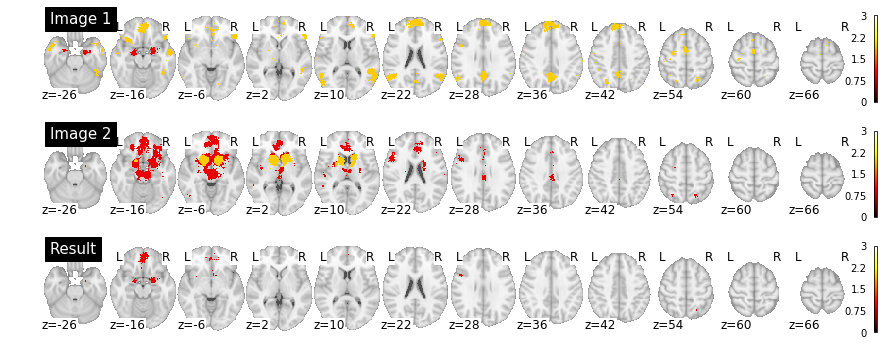

In [140]:
fig, axes = plt.subplots(3, 1, figsize=(15, 6))
p = plot_stat_map(img1, cut_coords=12, display_mode='z', title='Image 1', axes=axes[0], vmax=3)
plot_stat_map(img2, cut_coords=p.cut_coords, display_mode='z', title='Image 2', axes=axes[1], vmax=3)
p = plot_stat_map(result, cut_coords=p.cut_coords, display_mode='z', title='Result', axes=axes[2], vmax=3)


## The Python community
The last feature of Python I'll mention here is its exceptional community. Of course, every major programming has a large community devoted to the development, application, and promotion of that language; the key question is *who* the people in that community are. In general, the communities that develop around programming languages tend to reflect the interests and expertise bases of their users. In the case of relatively domain-specific languages like R and Matlab, this means that a large fraction of the people contributing new tools to the language are not primarily software developers, and instead tend to be statisticians, engineers, scientists, and so on. There is, of course, absolutely nothing wrong with statisticians or engineers. One of the benefits of R's ecosystem being populated by statisticians, for example, is that R features an array of statistical packages unparalleled by any other language.

The downside to having a community dominated by users from statistical or scientific backgrounds, however, is that such users are typically not trained in software development. As a result, the quality of the code they write tends to be lower (from a software standpoint). Best practices and conventions that are almost universally adopted by professional software engineers may have low penetrance in communities without such training. For example, many of the R packages available from CRAN lack any semblance of automated testing--something that would be almost unheard of for all but the smallest Python packages. And stylistically, code written by R and Matlab programmers tends to have much less consistency from person to person. The upshot is that, other things being equal, software written in Python tends to simply be more robust than code written in R. While this advantage of Python admittedly has little to do with the intrinsic characteristics of the language itself (there should be little question that one can write extremely high-quality code in any language (including R, Matlab, etc.), it's still the case that having a community of developers who emphasize common conventions and best practices tends to naturally make one write clearer, more disciplined, higher-quality code.

## Conclusions
Python is pretty great.